In [96]:
import os
import base64
from pathlib import Path
from typing import List
from io import BytesIO

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from PIL import Image
from umap import UMAP
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.animation import FuncAnimation

In [2]:
encoder_name = "uni"

data_dir = os.path.join("..", "data", "embeddings", "val", encoder_name)

os.path.isdir(data_dir)

True

In [3]:
tables = os.listdir(data_dir)

table_paths = [os.path.join(data_dir, f) for f in tables if "brightness" in f]
table_paths = sorted(table_paths, key=lambda x: float(Path(x).stem.split("-")[-1]))

table_paths[:5]

['../data/embeddings/val/uni/brightness-0.0.parquet',
 '../data/embeddings/val/uni/brightness-1.0050251256281406.parquet',
 '../data/embeddings/val/uni/brightness-4.522613065326633.parquet',
 '../data/embeddings/val/uni/brightness-6.030150753768844.parquet',
 '../data/embeddings/val/uni/brightness-9.045226130653266.parquet']

In [27]:
def get_embeddings(file_path: str):
    df = pd.read_parquet(file_path)
    embedding = df["embedding"].tolist()
    embedding = np.array(embedding)

    return embedding

def get_labels(file_path: str):
    df = pd.read_parquet(file_path)
    labels = df["label"].map(str).tolist()

    return labels

In [5]:
all_embeddings = [get_embeddings(f) for f in tqdm(table_paths, desc="extracting embeddings")]
all_augs = [Path(f).stem.split("-")[-1] for f in table_paths]

extracting embeddings: 100%|██████████| 62/62 [06:42<00:00,  6.50s/it]


In [28]:
all_labels = [get_labels(f) for f in tqdm(table_paths, desc="Extracting labels")]

Extracting labels: 100%|██████████| 62/62 [05:14<00:00,  5.07s/it]


In [6]:
umap = UMAP()

all_umap = [umap.fit_transform(embedding) for embedding in tqdm(all_embeddings, desc="Projecting UMAP")]

Projecting UMAP:   2%|▏         | 1/62 [00:15<15:57, 15.69s/it]/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Projecting UMAP:  10%|▉         | 6/62 [00:51<06:55,  7.42s/it]/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Projecting UMAP:  11%|█▏        | 7/62 [00:58<06:32,  7.14s/it]/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Projecting UMAP:  15%|█▍        | 9/62 [01:11<06:05,  6.89s/it]/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/sklear

In [55]:
def get_img(file_path: str, idx: int):
    df = pd.read_parquet(file_path)
    img = df["image"][idx].reshape(3, 96, 96)
    img = img.transpose(1, 2, 0)
    img = (img * 255).astype(np.uint8)

    img = Image.fromarray(img)
    return img

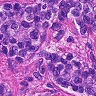

In [54]:
img = get_img(table_paths[1], idx=0)

img

In [56]:
imgs = [get_img(f, idx=0) for f in tqdm(table_paths, desc="Extracting Images")]

Converting Images: 100%|██████████| 62/62 [00:00<00:00, 2279.23it/s]


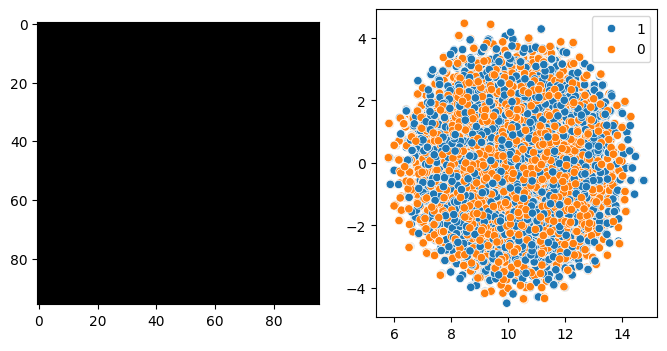

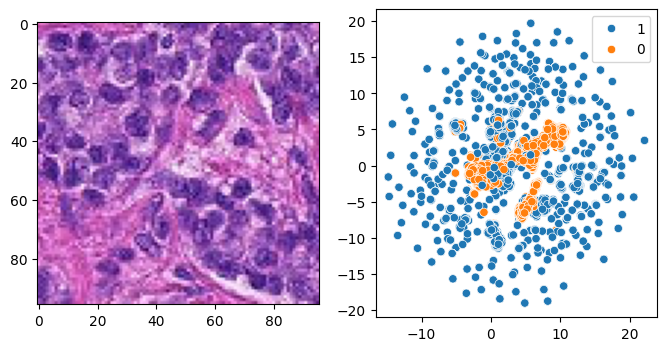

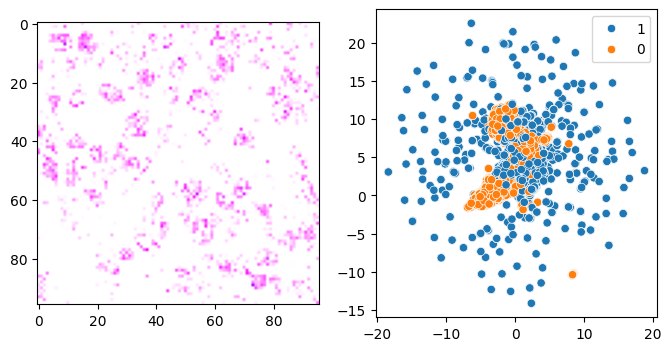

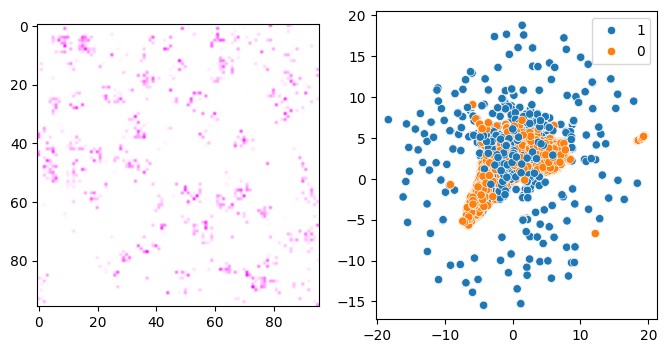

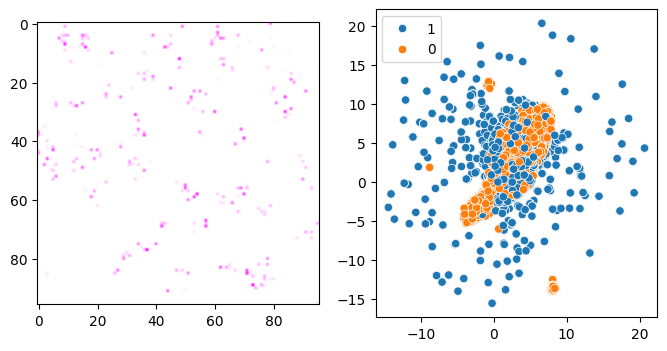

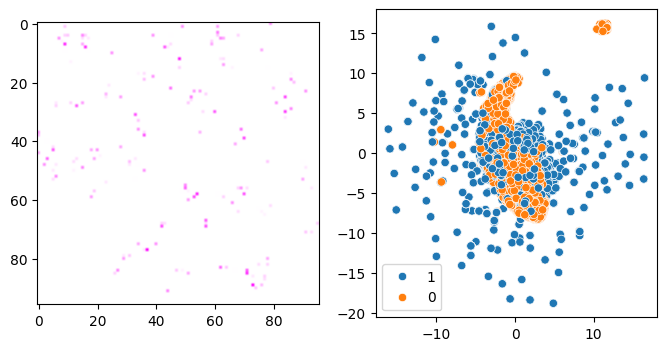

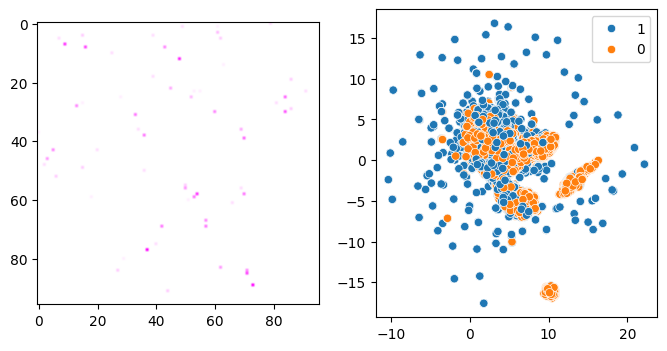

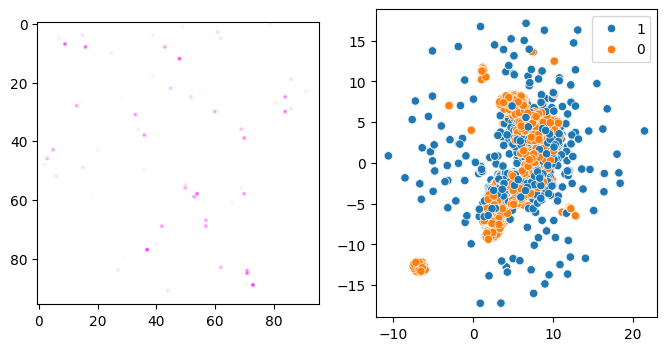

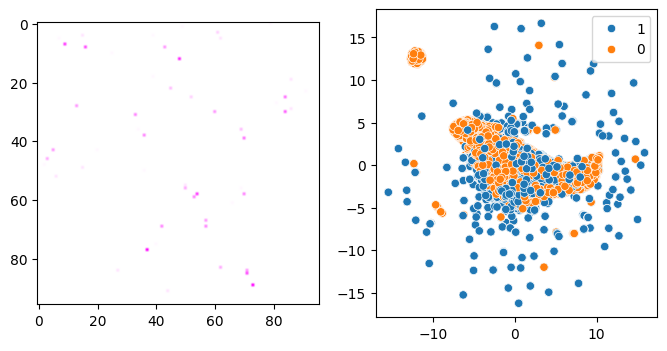

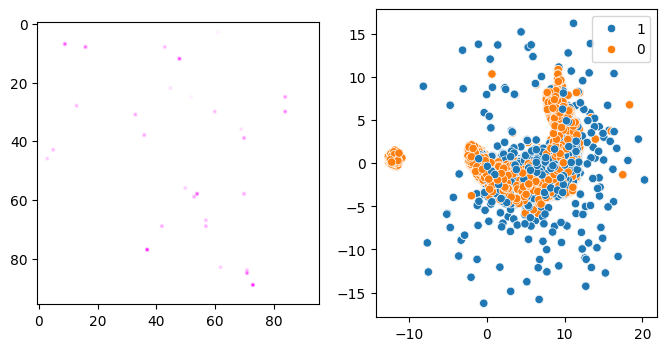

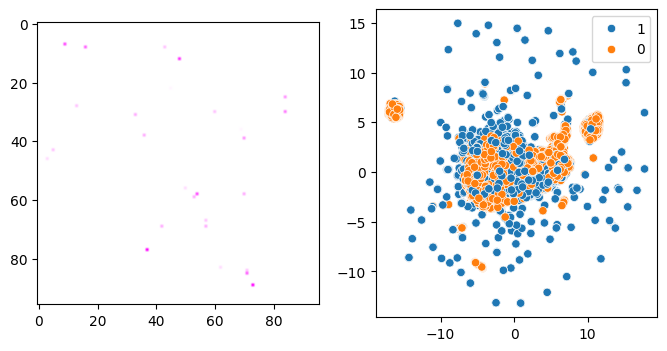

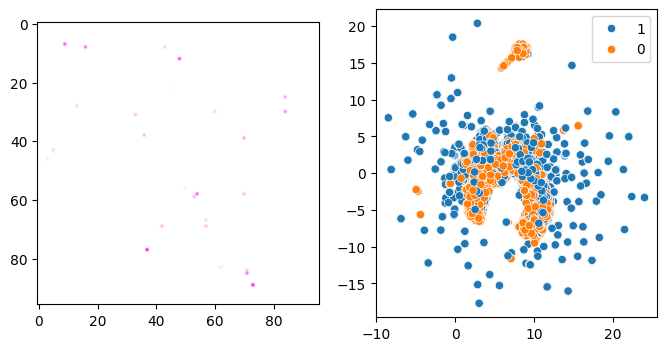

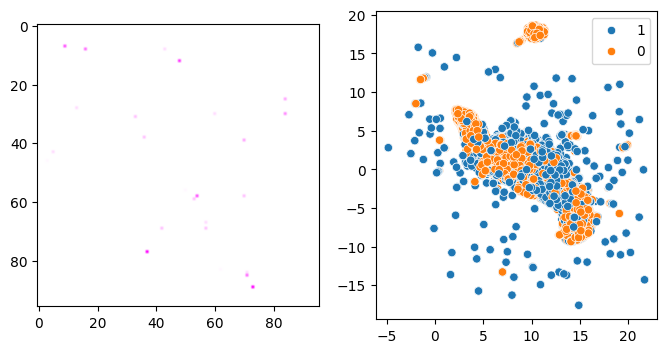

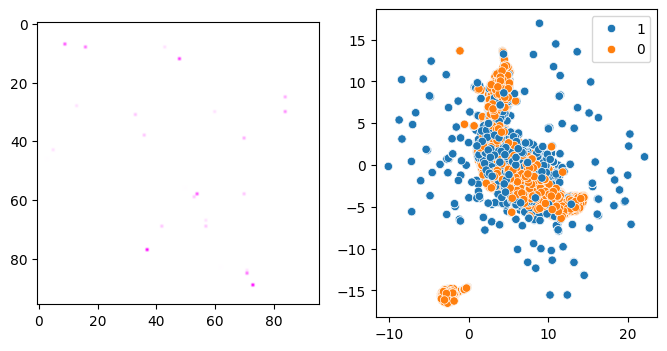

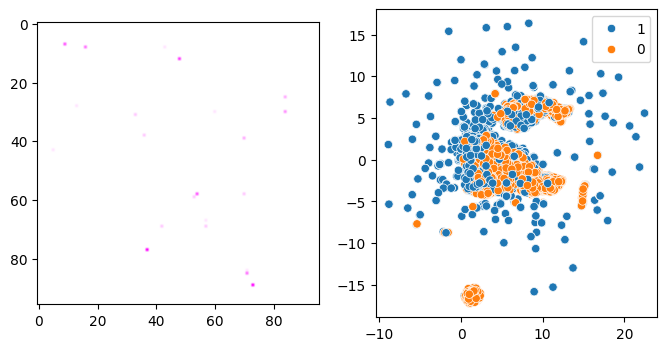

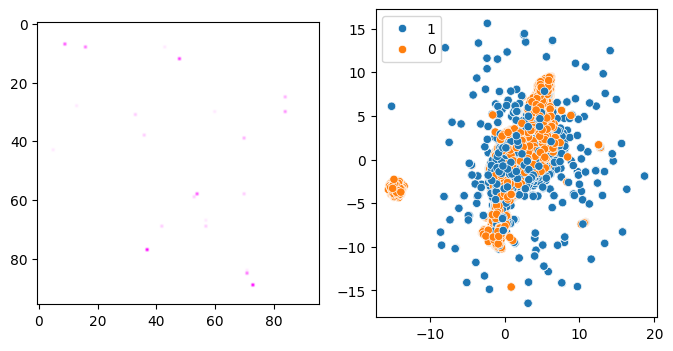

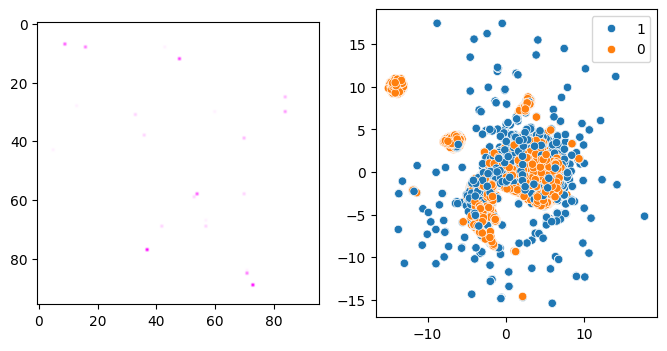

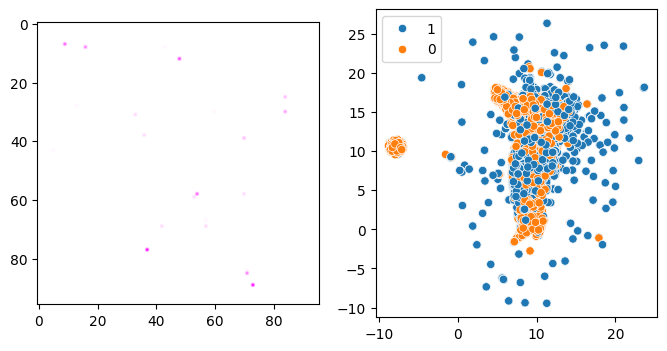

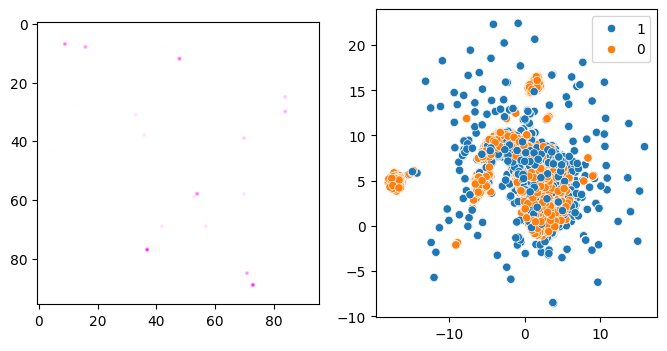

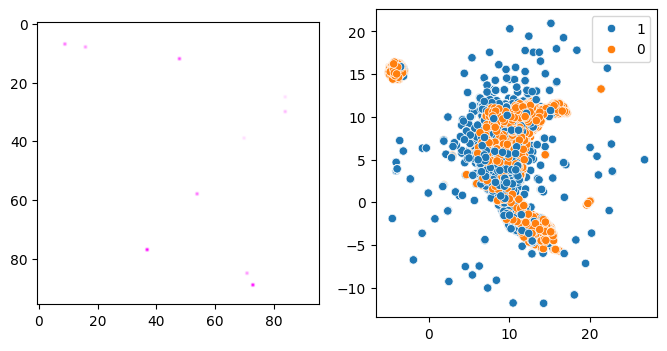

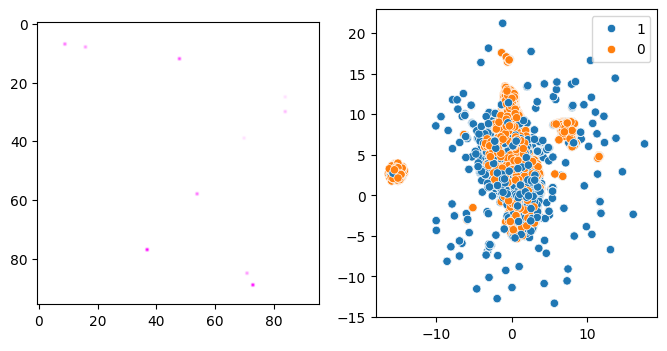

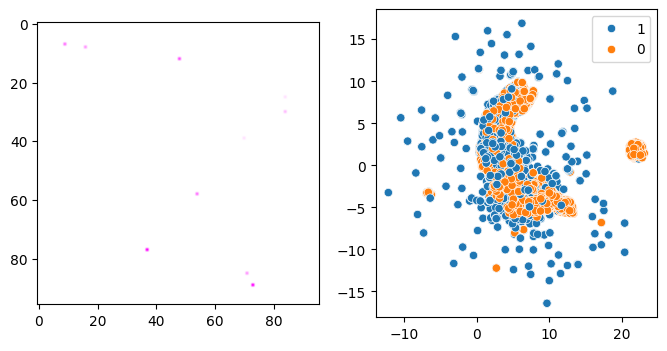

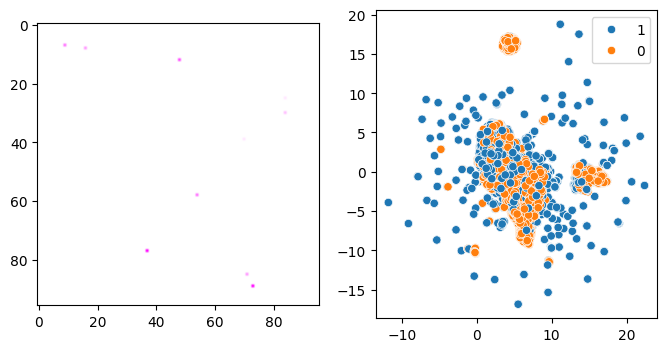

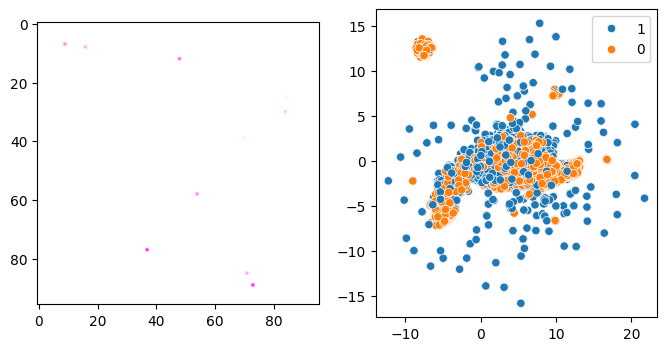

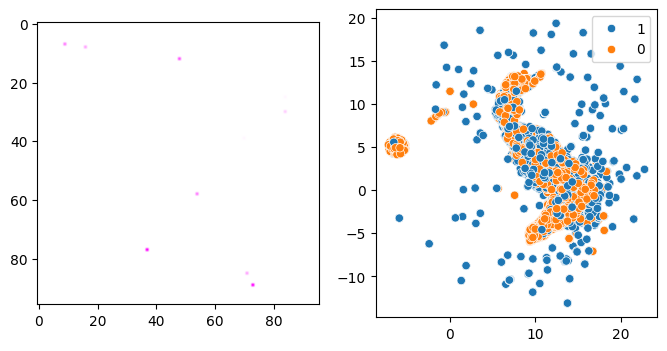

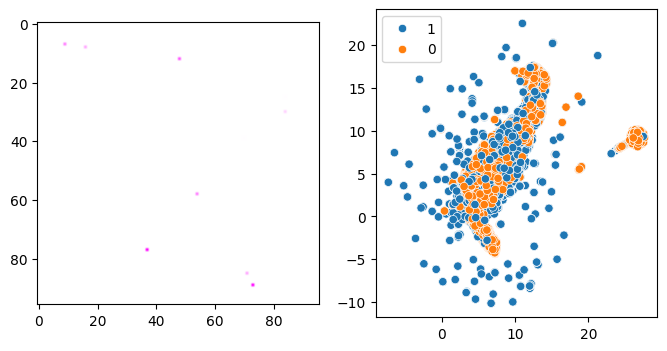

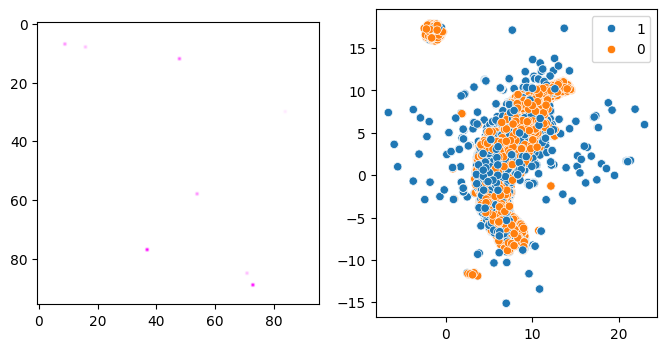

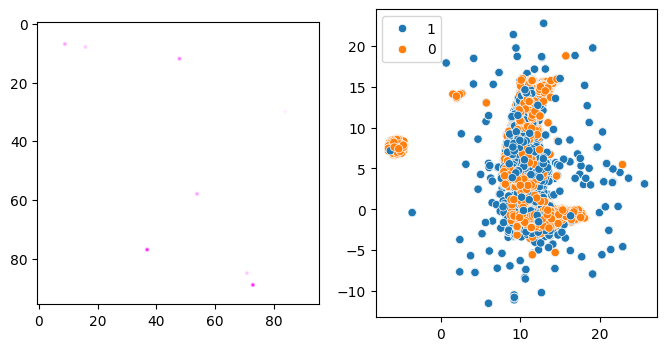

In [ ]:
colors = ["#ff66c4", "#875dca"]

for idx in range(len(imgs)):

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(imgs[idx])
    sns.scatterplot(
        x=all_umap[idx][:, 0], 
        y=all_umap[idx][:, 1], 
        hue=all_labels[0], 
        ax=axes[1], 
        palette=colors
        )

    plt.show()

In [ ]:
# data = []

# for idx, (umap, labels) in enumerate(zip(all_umap, all_labels)):
#     frame_data = pd.DataFrame({
#         'x': umap[:, 0],
#         'y': umap[:, 1],
#         'label': labels,
#         'sample_id': np.arange(len(umap)),  
#         'brightness': all_augs[idx]
#     })
#     data.append(frame_data)

# df = pd.concat(data)  

# fig = px.scatter(
#     df,
#     x="x", y="y", color="label", animation_frame="brightness", animation_group="sample_id",
#     hover_name="sample_id",  
#     labels={"label": "Class Label"},
#     title="UMAP Animation Across Transformation States",
#     color_discrete_sequence=px.colors.qualitative.Prism,
#     range_x=[-20, 20], 
#     range_y=[-20, 20],
#     opacity=0.7,
#     height=800,
#     width=800
# )

# fig.show()

In [91]:
# data = []
# for idx, (umap, labels) in enumerate(zip(all_umap, all_labels)):
#     frame_data = pd.DataFrame({
#         'x': umap[:, 0],
#         'y': umap[:, 1],
#         'label': labels,
#         'sample_id': np.arange(len(umap)),
#         'brightness': all_augs[idx]
#     })
#     data.append(frame_data)

# df = pd.concat(data)

In [92]:
# fig = make_subplots(
#     rows=1, cols=2,
#     subplot_titles=("UMAP Embeddings", "Augmented Images"),
#     specs=[[{"type": "scatter"}, {"type": "image"}]]
# )

# for idx in range(len(all_embeddings)):
#     frame_data = df[df["brightness"] == all_augs[idx]]
#     fig.add_trace(
#         go.Scatter(
#             x=frame_data['x'],
#             y=frame_data['y'],
#             mode='markers',
#             marker=dict(size=8, color=frame_data['label'].astype(int), colorscale='Viridis'),
#             name=f"Brightness {all_augs[idx]}",
#             visible=(idx == 0)  # Only show the first frame initially
#         ),
#         row=1, col=1
#     )

# for idx, img in enumerate(imgs):
#     fig.add_trace(
#         go.Image(
#             z=img,
#             name=f"Brightness {all_augs[idx]}",
#             visible=(idx == 0)  # Only show the first frame initially
#         ),
#         row=1, col=2
#     )

In [90]:
# frames = []
# for idx in range(len(all_augs)):
#     scatter_visibility = [False] * len(all_embeddings)
#     scatter_visibility[idx] = True  # Only the current scatter plot is visible

#     image_visibility = [False] * len(imgs)
#     image_visibility[idx] = True  # Only the current image is visible

#     frames.append(
#         go.Frame(
#             data=[
#                 go.Scatter(
#                     x=df[df['brightness'] == all_augs[idx]]['x'],
#                     y=df[df['brightness'] == all_augs[idx]]['y'],
#                     mode='markers',
#                     marker=dict(size=8, color=df[df['brightness'] == all_augs[idx]]['label'].astype(int), colorscale='Viridis'),
#                     visible=True
#                 ),
#                 go.Image(
#                     z=imgs[idx],  # Update image
#                     visible=True
#                 )
#             ],
#             traces=[idx, idx + len(all_embeddings)]  # Specify which traces to update
#         )
#     )

# fig.frames = frames

# # Add Play/Pause buttons
# fig.update_layout(
#     updatemenus=[
#         dict(
#             type="buttons",
#             showactive=False,
#             buttons=[
#                 dict(label="Play", method="animate", args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}]),
#                 dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}])
#             ]
#         )
#     ]
# )

# # Set axis titles and layout
# fig.update_layout(
#     title="UMAP Embeddings and Augmented Images Animation",
#     xaxis_title="UMAP Dimension 1",
#     yaxis_title="UMAP Dimension 2",
#     xaxis2=dict(title="Image Index"),
#     yaxis2=dict(title="Image Augmentation"),
#     template="plotly_white"
# )

# fig.show()